In [2]:
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import plotly.express as px
import missingno as msno
import make_uni_df

In [3]:
uni_df = make_uni_df.get_dummied_df()
uni_df

,Participant,Studiengang,Standort,Besuch Wirtschaftsmathematik,Geburtsjahr,Durchschnittsnote im Abitur,Mathematiknote im Abitur,LK_Deutsch,LK_Mathe,LK_Englisch,...,Mathenote im 2. Semester,Zufriedenheit mit Note,Männlich,Weiblich,Divers,Single,Nicht_zusammen,Zusammen_lebend,Verheiratet,Keine_Angabe
0,53,4,21,5.0,24.0,NaN,NaN,0.0,0.0,1.0,...,NaN,NaN,1,0,0,0,0,0,0,0
1,55,4,21,6.0,19.0,3.0,3.0,0.0,1.0,0.0,...,1.3,2.0,0,1,0,0,0,1,0,0
2,56,4,21,6.0,22.0,3.3,2.8,0.0,0.0,1.0,...,NaN,NaN,0,1,0,1,0,0,0,0
3,57,16,21,8.0,21.0,2.3,3.0,1.0,0.0,0.0,...,NaN,NaN,0,1,0,0,1,0,0,0
4,58,16,21,5.0,19.0,NaN,NaN,NaN,NaN,NaN,...,1.7,3.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1022,24,18,NaN,23.0,2.0,2.0,0.0,0.0,1.0,...,2.0,3.0,0,1,0,0,0,0,0,0
882,1023,24,18,NaN,23.0,3.3,4.0,0.0,1.0,0.0,...,4.0,2.0,0,1,0,0,1,0,0,0
883,1024,4,18,NaN,20.0,NaN,3.0,0.0,1.0,0.0,...,3.7,3.0,1,0,0,0,0,0,0,0
884,1025,5,18,6.0,22.0,2.0,2.0,0.0,1.0,1.0,...,3.0,2.0,1,0,0,1,0,0,0,0


In [4]:
uni_df.isna().sum()

Participant                                   0
Studiengang                                   0
Standort                                      0
Besuch Wirtschaftsmathematik                 76
Geburtsjahr                                  25
Durchschnittsnote im Abitur                 119
Mathematiknote im Abitur                    126
LK_Deutsch                                   50
LK_Mathe                                     50
LK_Englisch                                  50
Religion                                      6
Lernaufwand                                 510
Schwierigkeitsgrad                          405
Umfang                                      405
Erwartungen                                 405
Zeit-Studium                                548
Zeit-Praxispartner                          548
Zeit-Nebenjob                               548
Zeit-Hobbys                                 548
Zeit-Freizeit                               548
Zeit-Hausarbeit                         

<Axes: >

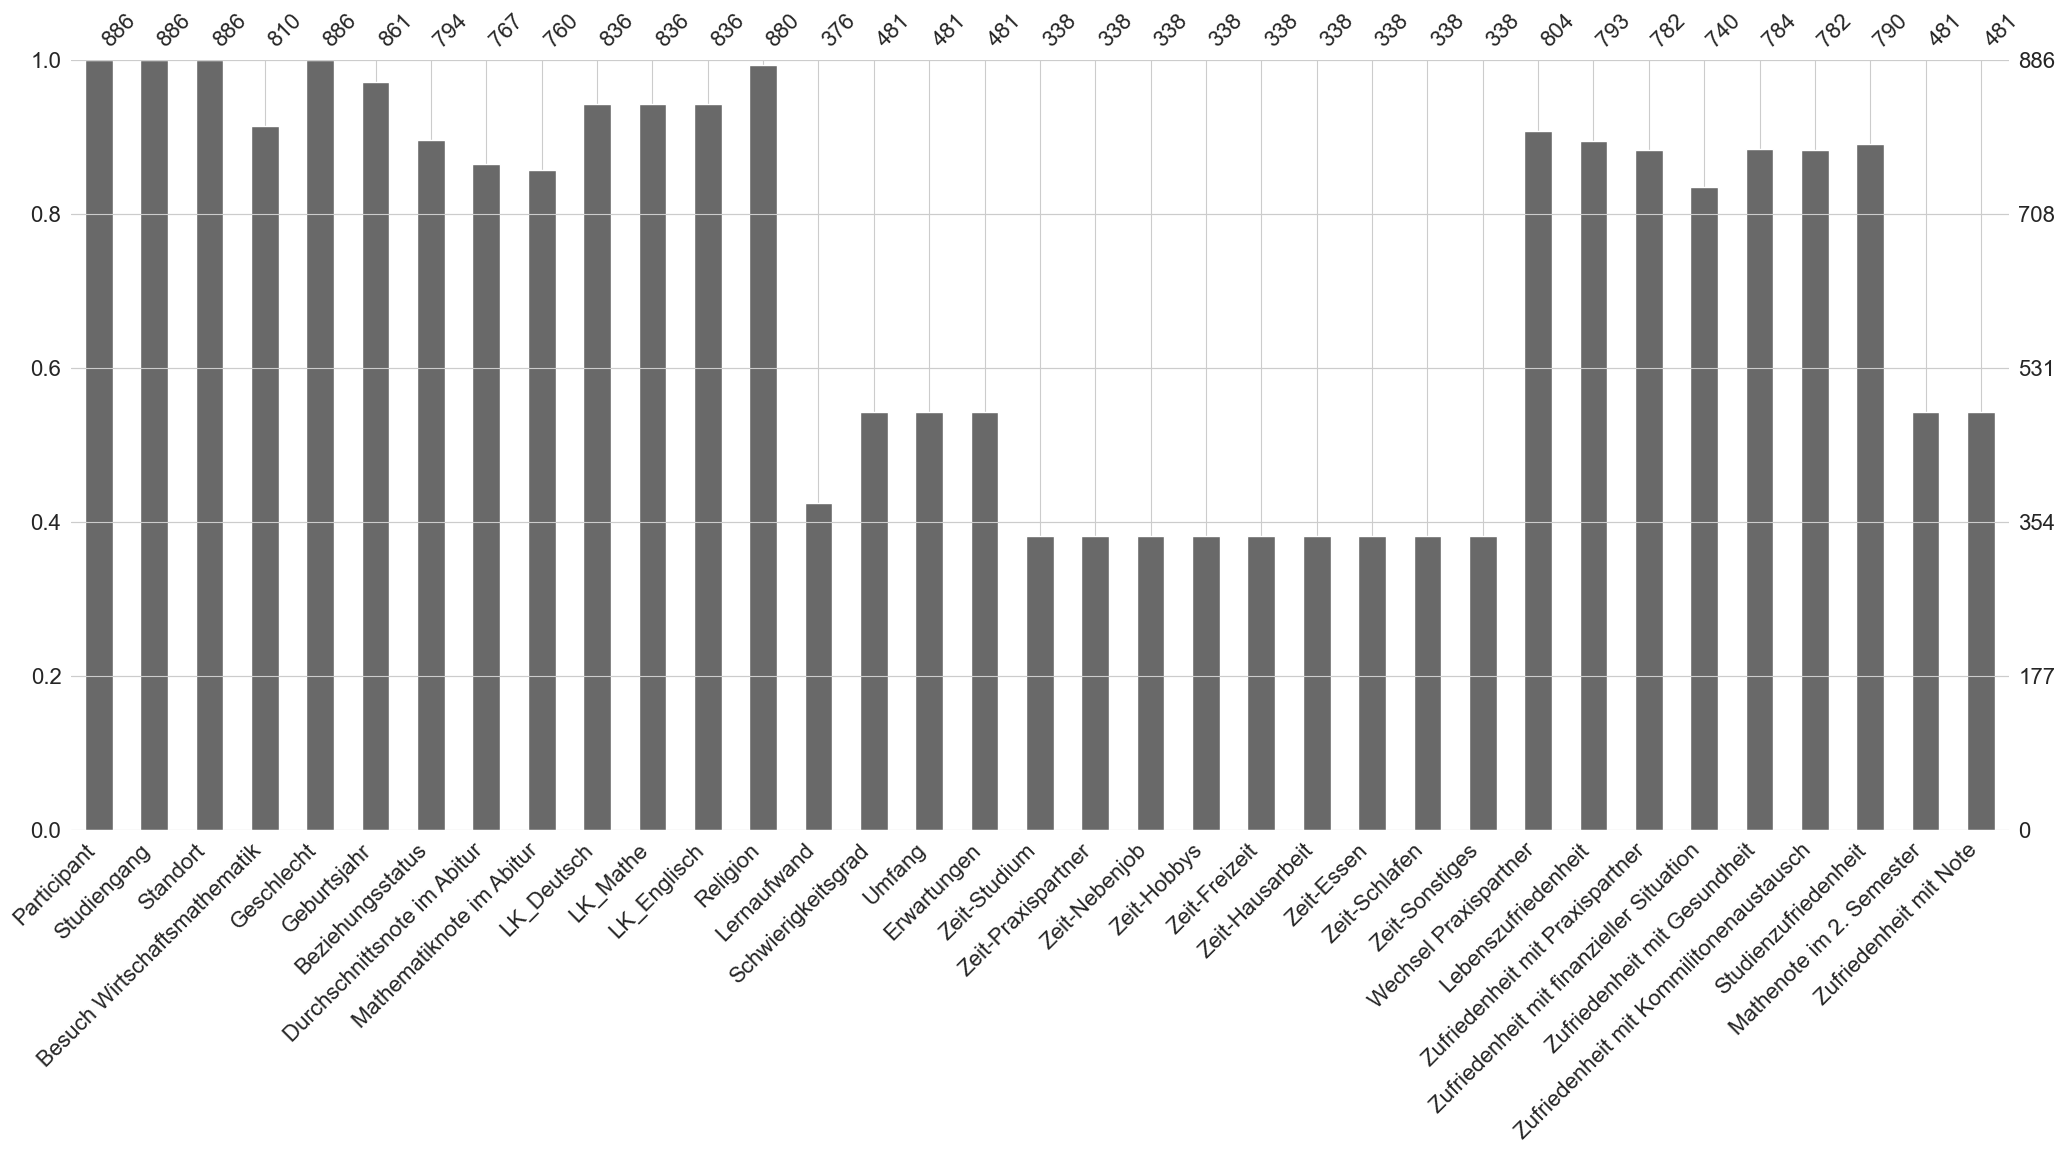

In [13]:
# Graphische Darstellung der fehlenden Werte
msno.bar(uni_df)



##2. Erstelle für diesen neuen Datensatz eine vollständige deskriptive Statistik und zeige dabei: Welche Variablen sind noch enthalten, wie sind diese ausgeprägt (Häufigkeiten / Lage- und Streuungsmaße / Boxplots & Histogramme)

                          Variable  durchgeführter Test  Ergebnis des Tests
0             Studienzufriedenheit  Pearson-Korrelation        4.246728e-30
1     Zufriedenheit_mit_Gesundheit  Pearson-Korrelation        1.879124e-28
2  Zufriedenheit_mit_Praxispartner  Pearson-Korrelation        7.337529e-22

Descriptive Statistics:
       Studienzufriedenheit  Zufriedenheit_mit_Gesundheit  \
count            759.000000                    759.000000   
mean               5.951252                      6.620553   
std                2.100759                      2.467391   
min                0.000000                      0.000000   
25%                5.000000                      5.000000   
50%                6.000000                      7.000000   
75%                7.000000                      9.000000   
max               10.000000                     10.000000   

       Zufriedenheit_mit_Praxispartner  
count                       759.000000  
mean                          6.737813 

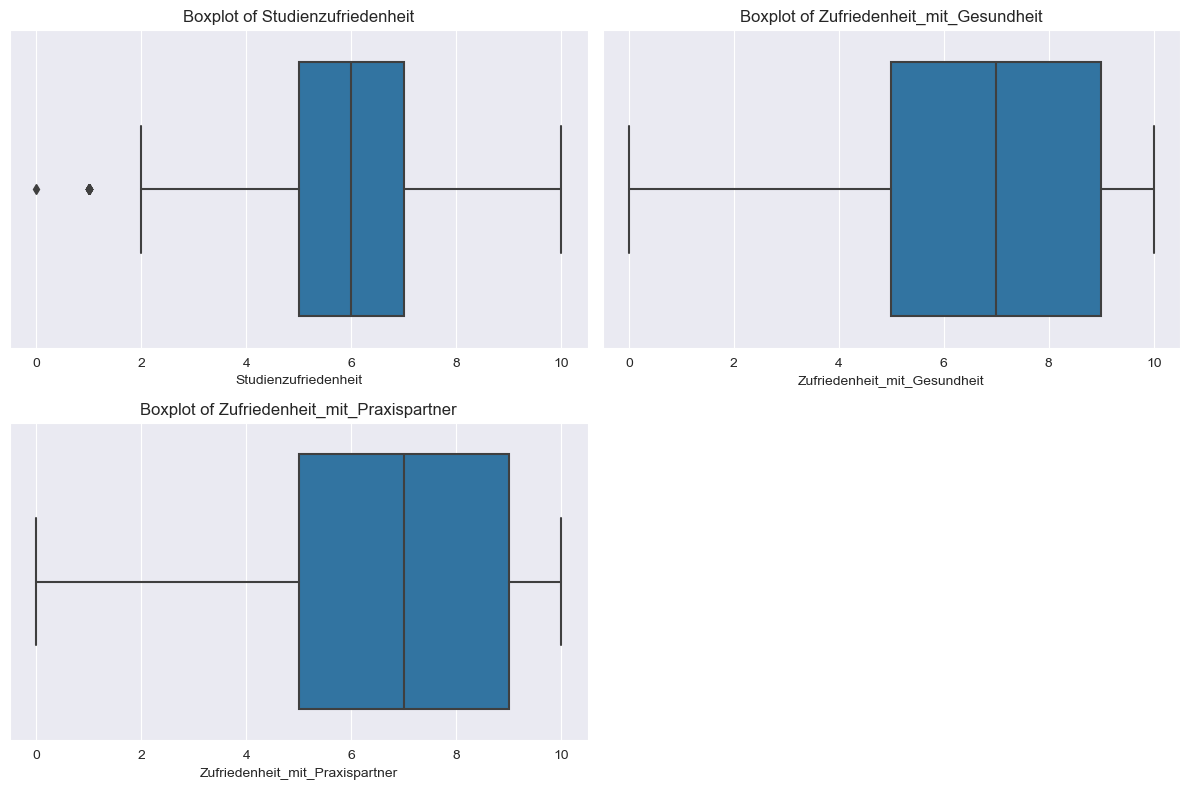

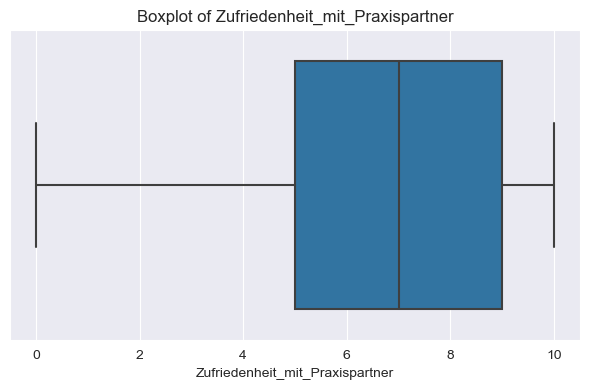

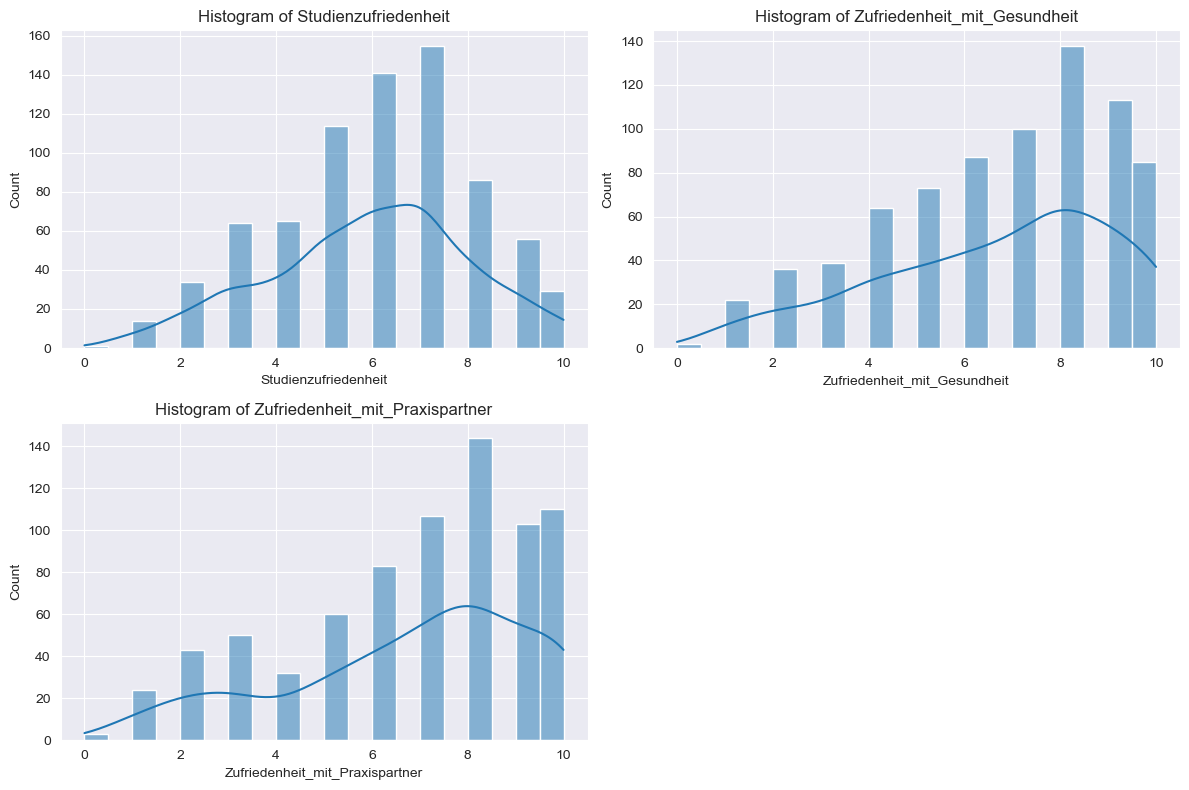

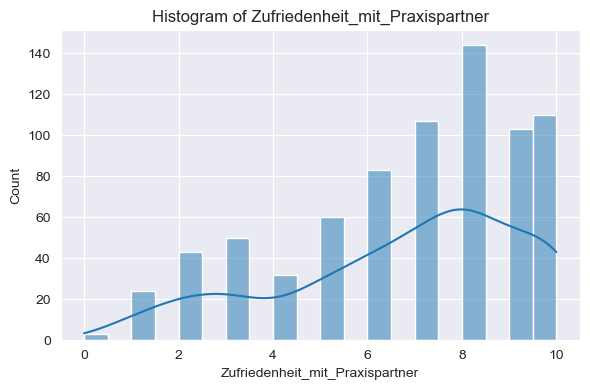

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

columns_list = uni_df.columns
columns_without_spaces = [column_name.replace(" ","_").replace("-","_").replace(".","") for column_name in columns_list]
uni_df.columns = columns_without_spaces

dependent_variable = 'Lebenszufriedenheit'
selected_variables = ['Studienzufriedenheit', 'Zufriedenheit_mit_Gesundheit', 'Zufriedenheit_mit_Praxispartner']


uni_df_cleaned = uni_df[selected_variables + [dependent_variable]].dropna()

significant_variables = []

if all(var in uni_df_cleaned.columns for var in selected_variables):
    for column in selected_variables:
        x = uni_df_cleaned[column]
        y = uni_df_cleaned[dependent_variable]

        if pd.api.types.is_numeric_dtype(x):

            x = x.replace([np.inf, -np.inf], np.nan).dropna()

            corr, p_value = stats.pearsonr(x, y)
            test_name = 'Pearson-Korrelation'
        elif pd.api.types.is_categorical_dtype(x):
            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            continue

        significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

    significant_variables_df = pd.DataFrame(significant_variables)
    print(significant_variables_df)

    descriptive_stats = uni_df_cleaned[selected_variables].describe()
    print("\nDescriptive Statistics:")
    print(descriptive_stats)

    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.boxplot(x=variable, data=uni_df_cleaned)
        plt.title(f"Boxplot of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=selected_variables[2], data=uni_df_cleaned)
    plt.title(f"Boxplot of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.histplot(uni_df_cleaned[variable], bins=20, kde=True)
        plt.title(f"Histogram of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(uni_df_cleaned[selected_variables[2]], bins=20, kde=True)
    plt.title(f"Histogram of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

else:
    print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")


['Studienzufriedenheit', 'Zufriedenheit_mit_Praxispartner', 'Zufriedenheit_mit_Gesundheit', 'Besuch_Wirtschaftsmathematik', 'Zeit_Praxispartner', 'Zufriedenheit_mit_finanzieller_Situation', 'Zeit_Praxispartner']
x
1      7.0
5      8.0
7      9.0
9      5.0
13     7.0
      ... 
871    8.0
872    7.0
873    7.0
878    6.0
879    4.0
Name: Studienzufriedenheit, Length: 280, dtype: float64
y
1       5.0
5       9.0
7       8.0
9       7.0
13      8.0
       ... 
871     9.0
872     8.0
873    10.0
878     6.0
879     9.0
Name: Lebenszufriedenheit, Length: 280, dtype: float64
x
1       3.0
5      10.0
7       7.0
9       6.0
13     10.0
       ... 
871     7.0
872     8.0
873    10.0
878     8.0
879    10.0
Name: Zufriedenheit_mit_Praxispartner, Length: 280, dtype: float64
y
1       5.0
5       9.0
7       8.0
9       7.0
13      8.0
       ... 
871     9.0
872     8.0
873    10.0
878     6.0
879     9.0
Name: Lebenszufriedenheit, Length: 280, dtype: float64
x
1      5.0
5      9.0
7     

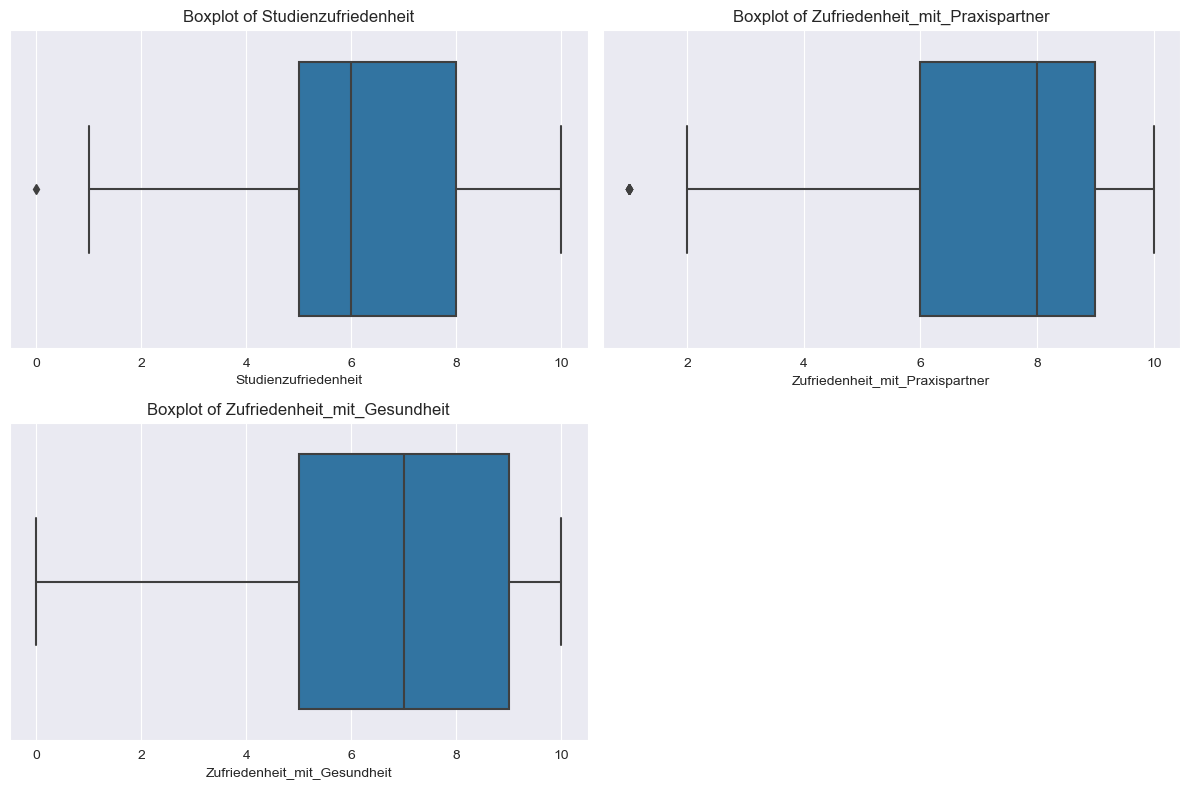

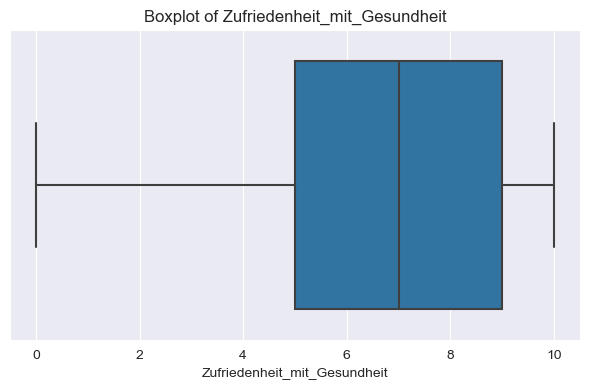

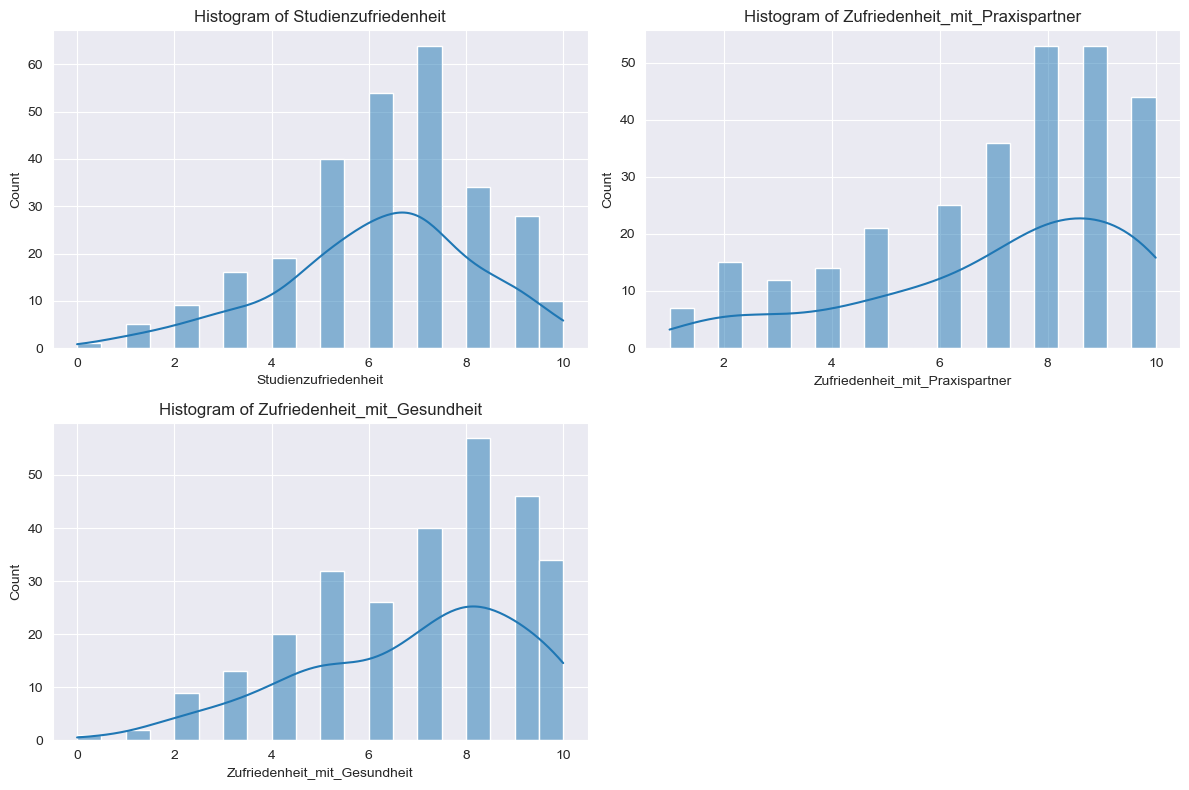

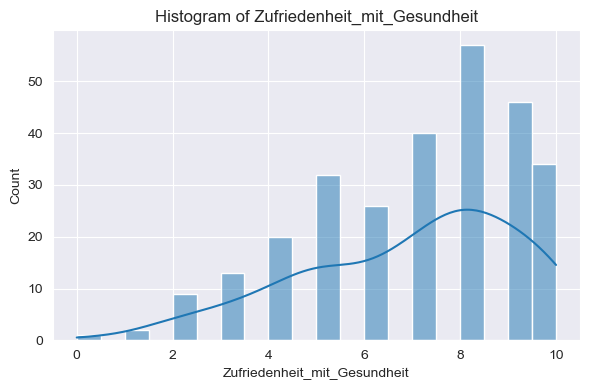

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import make_uni_df

# Read the data
uni_df = make_uni_df.get_dummied_df()
uni_df = uni_df[['Lebenszufriedenheit','Studienzufriedenheit','Zufriedenheit_mit_Praxispartner','Zufriedenheit_mit_Gesundheit','Besuch_Wirtschaftsmathematik','Zeit_Praxispartner','Zufriedenheit_mit_finanzieller_Situation','Zeit_Praxispartner']]
dependent_variable = 'Lebenszufriedenheit'
#selected_variables = ['Studienzufriedenheit', 'Beziehungsstatus', 'Zufriedenheit mit Praxispartner']
#print(type(selected_variables))
selected_variables = list(uni_df.columns)
selected_variables.remove('Lebenszufriedenheit')
print(selected_variables)

uni_df_cleaned = uni_df[selected_variables + [dependent_variable]].dropna()

significant_variables = []

if all(var in uni_df_cleaned.columns for var in selected_variables):
    for column in selected_variables:
        x = uni_df_cleaned[column]
        y = uni_df_cleaned[dependent_variable]

        if pd.api.types.is_numeric_dtype(x):

            x = x.replace([np.inf, -np.inf], np.nan).dropna()
            print("x")
            print(x)
            print("y")
            print(y)
            corr, p_value = stats.pearsonr(x, y)
            #corr = "Test"
            #p_value = 0.05
            test_name = 'Pearson-Korrelation'
        elif pd.api.types.is_categorical_dtype(x):
            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            continue

        significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

    significant_variables_df = pd.DataFrame(significant_variables)
    print(significant_variables_df)

    descriptive_stats = uni_df_cleaned[selected_variables].describe()
    print("\nDescriptive Statistics:")
    print(descriptive_stats)

    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.boxplot(x=variable, data=uni_df_cleaned)
        plt.title(f"Boxplot of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=selected_variables[2], data=uni_df_cleaned)
    plt.title(f"Boxplot of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

    # Histograms for the selected variables
    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(selected_variables[:3]):
        plt.subplot(2, 2, i+1)
        sns.histplot(uni_df_cleaned[variable], bins=20, kde=True)
        plt.title(f"Histogram of {variable}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(uni_df_cleaned[selected_variables[2]], bins=20, kde=True)
    plt.title(f"Histogram of {selected_variables[2]}")
    plt.tight_layout()
    plt.show()

else:
    print("Die ausgewählten Variablen sind nicht im DataFrame vorhanden.")


In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

dependent_variable = 'Lebenszufriedenheit'
selected_variables = ['Durchschnittsnote im Abitur', 'Mathematiknote im Abitur',  'Schwierigkeitsgrad', 'Zufriedenheit mit Gesundheit']

# Step 1: Data cleaning (dropping rows with missing values in selected variables)
uni_df_cleaned = uni_df.dropna(subset=[dependent_variable] + selected_variables)

# Step 2: Handle infinite and NaN values
uni_df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
uni_df_cleaned.dropna(inplace=True)

# Step 3: Convert categorical variable 'Geschlecht' into dummy variables
uni_df_cleaned = pd.get_dummies(uni_df_cleaned, columns=['Geschlecht'], drop_first=True)

# Check if 'Geschlecht' is present after dummy variable conversion
if 'Geschlecht' not in uni_df_cleaned.columns:
    uni_df_cleaned['Geschlecht'] = np.nan

# Step 4: Create the regression model
x = uni_df_cleaned[selected_variables]
y = uni_df_cleaned[dependent_variable]

X = sm.add_constant(x)  # Add a constant (for the intercepts)
model = sm.OLS(y, X).fit()

# Step 5: Interpret the results
print(model.summary())

# R^2 and adj. R^2
print("R^2:", model.rsquared)
print("Adjusted R^2:", model.rsquared_adj)

# F-statistic and p-value
print("F-statistic:", model.fvalue)
print("p-value (F-test):", model.f_pvalue)

# Interpretation of the coefficients table (as an example, the output depends on the actual variables)
print("\nCoefficients Table:")
coefficients = model.params[1:]  # Skip the first row as it is the constant
p_values = model.pvalues[1:]    # Skip the first row as it is the constant

for variable, coef, p_value in zip(selected_variables, coefficients, p_values):
    print(f"{variable}: Coefficient = {coef:.4f}, p-value = {p_value:.4f}")


                             OLS Regression Results                            
Dep. Variable:     Lebenszufriedenheit   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Thu, 20 Jul 2023   Prob (F-statistic):                nan
Time:                         13:18:50   Log-Likelihood:                 147.21
No. Observations:                    5   AIC:                            -284.4
Df Residuals:                        0   BIC:                            -286.4
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

C:\Users\User\Desktop\Statistik\praxis_Statistik\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\Desktop\Statistik\praxis_Statistik\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\User\Desktop\Statistik\praxis_Statistik\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\User\Desktop\Statistik\praxis_Statistik\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
